#### CHebyschev Polynomials and Approx. Theory
To evaluate functions, we think of functions as linear combinations of Chebyshev polynomials \(T_n(x)\). These polynomials have some special properties:

1. They are minimax functions over the range \([-1, 1]\), meaning that all their minima/maxima/extrema are at $\pm 1$.
2. They are orthogonal over the range \([-1, 1]\) with weight $\frac{1}{\sqrt{1-x^2}}$.
3. The Chebyshev polynomials have the following recurrence relation:
   $T_0(x) = 1$
   $T_1(x) = x$
   $T_{n+1}(x) = 2xT_n(x) - T_{n-1}(x)$
   $T_n(x) = \cos(n \cos^{-1}(x))$

Let's say we have a given function \(f(x)\) over the range \(x \in [a, b]\). We can express \(f(x) = \sum_{k} c_k T_k(u)\) where \(u = \frac{2x-a-b}{b-a}\) and \(x = \frac{b-a}{2}u + \frac{a+b}{2}\). This transformation maps the interval \(x \in [a, b]\) to \(u \in [-1, 1]\).

The problem then becomes a matter of figuring out the coefficients \(c_k\), which can be done using the Chebyshev nodes:

1. Choose the degree of the Chebyshev polynomial approximation, say \(n\).
2. Calculate the Chebyshev nodes \(x_i\) over the interval \([a, b]\), which are given by $x_i = \cos\left(\frac{2i-1}{2n}\pi\right)\)$ for $\(i = 1, 2, \ldots, n$.
3. Evaluate the function \(f(x)\) at the Chebyshev nodes to obtain $f(x_i))$ for $(i = 1, 2, \ldots, n$.
4. Use the Chebyshev interpolation formula to find the coefficients \(c_k\):
   $c_k = \frac{2}{n} \sum_{i=1}^{n} f(x_i) \cos\left(\frac{(k-1)(2i-1)\pi}{2n}\right)$

Once you have the coefficients \(c_k\), you can use them to evaluate the function \(f(x)\) at any point \(x\) using the formula:
\[f_{\text{approx}}(x) = \sum_{k} c_k T_k(u)\]



To approximate a given function \(f(x)\) using Chebyshev polynomials, we need to find the coefficients \(c_k\) of the Chebyshev polynomial expansion.

The general expression for a Chebyshev polynomial of degree \(n\) is \(T_n(x) = \cos(n \cos^{-1}(x))\). For a given function \(f(x)\) over a specific interval \([a, b]\), we can use Chebyshev interpolation to find the coefficients \(c_k\) that best approximate \(f(x)\) with a Chebyshev polynomial of a certain degree.

#### Chebyshev interpolation:

1. Choose the degree of the Chebyshev polynomial approximation, say \(n\).
2. Calculate the Chebyshev nodes \(x_i\) over the interval \([a, b]\), which are given by $x_i = \cos\left(\frac{2i-1}{2n}\pi\right)$for $i = 1, 2, \ldots, n$.
3. Evaluate the function \(f(x)\) at the Chebyshev nodes to obtain $f(x_i)$ for $i = 1, 2, \ldots, n$.
4. Use the Chebyshev interpolation formula to find the coefficients $c_k$:

 $  c_k = \frac{2}{n} \sum_{i=1}^{n} f(x_i) \cos\left(\frac{(k-1)(2i-1)\pi}{2n}\right)$

   for $k = 1, 2, \ldots, n$

Once you have the coefficients \(c_k\), you can use them to evaluate the Chebyshev polynomial approximation at any point \(x\) using the formula:

$f_{\text{approx}}(x) = \sum_{k=1}^{n} c_k T_{k-1}(u)$

where $u = \frac{2x-a-b}{b-a}$ maps the interval \([a, b]\) to \([-1, 1]\).

Note: accuracy of the Chebyshev polynomial approximation depends on the choice of the degree \(n\) and the number of Chebyshev nodes used for interpolation. Larger values of \(n\) and more nodes generally provide better approximations but may require more computational resources. The choice of \(n\) should be balanced between accuracy and efficiency for a specific application.


In [6]:
import numpy as np

# f(x) = log2(x)
def f(x):
    return np.log2(x)

#CHebyschev coefficients : Till n=5   
coefficients = [0.54311, 0.49505, -0.042469, 0.0048577, -6.2508e-4, 8.5757e-5]
# coefficients=[ 1.27688293 , 0.42068097 ,-0.08087052 , 0.0318506,  -0.01484002,  0.00614694]

def chebyshev_approximation(x, coefficients):
    u = 2 * x - 3  # Transform x to u in the range [-1, 1]
    approximation = np.polynomial.chebyshev.chebval(u, coefficients)
    return approximation


# APrroximation over range:  

x_values = np.linspace(0.0001, 1.5, 200)
approx_values = [chebyshev_approximation(x, coefficients) for x in x_values]
true_values = f(x_values)

error = np.abs(approx_values - true_values)


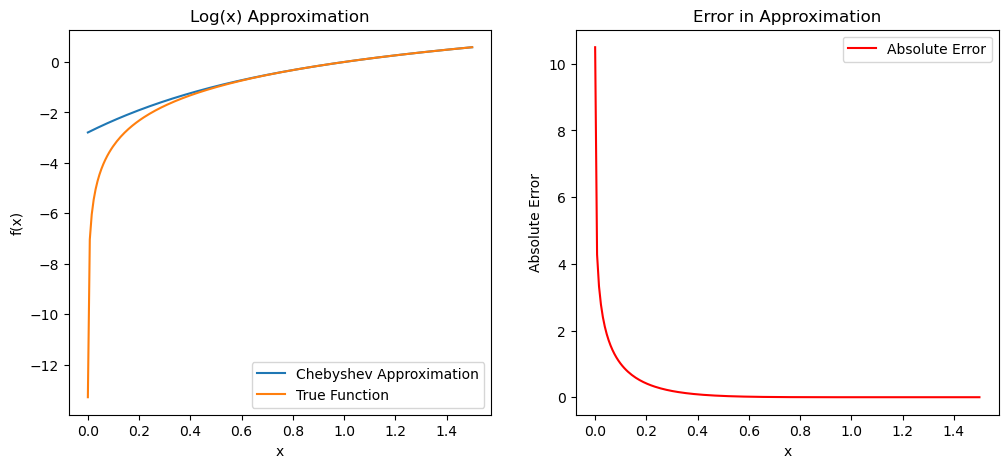

In [7]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Plot for approximation and true function
axs[0].plot(x_values, approx_values, label='Chebyshev Approximation')
axs[0].plot(x_values, true_values, label='True Function')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].set_title('Log(x) Approximation')
axs[0].legend()

# Plot for absolute error
axs[1].plot(x_values, error, label='Absolute Error', color='red')
axs[1].set_xlabel('x')
axs[1].set_ylabel('Absolute Error')
axs[1].set_title('Error in Approximation')
axs[1].legend()

plt.show()


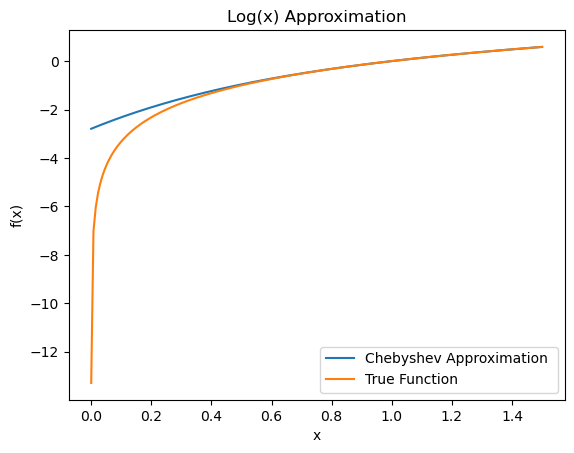

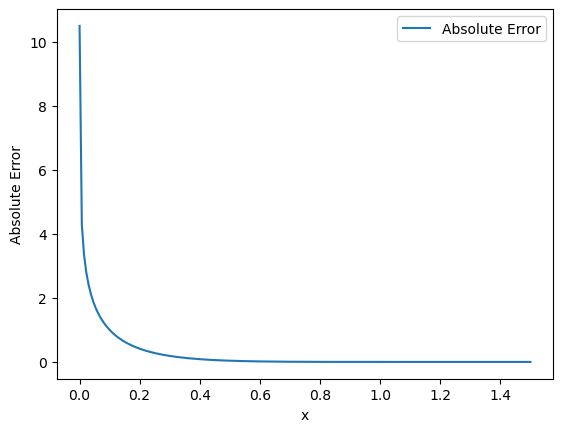

In [4]:
import matplotlib.pyplot as plt
# plt.ylim(15)
plt.title("Log(x) Approximation")

plt.plot(x_values, approx_values, label='Chebyshev Approximation ')
plt.plot(x_values, true_values, label='True Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

#error
plt.figure()
plt.plot(x_values, error, label='Absolute Error')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


In [13]:
import numpy as np

# f(x) = sqrt(x)
def f(x):
    return np.sqrt(x)

# Chebyshev coefficients: Till n=5
coefficients = [1.542, 0.49296, -0.040488, 0.0066968, -0.0013836, 0.00030211]

def chebyshev_approximation(x, coefficients):
    u = np.sqrt(x) # Transform x to u in the range [-1, 1]
    approximation = np.polynomial.chebyshev.chebval(u, coefficients)
    return approximation

# Approximation over range:
x_values = np.linspace(0.1, 4, 100)
approx_values = [chebyshev_approximation(x, coefficients) for x in x_values]
true_values = f(x_values)

error = np.abs(approx_values - true_values)
print(error)
for i in range(len(approx_values)): 
    approx_values[i]-=1

[1.4084587  1.37601661 1.34763613 1.32202997 1.2984761  1.27652131
 1.25585892 1.23627001 1.21759179 1.19969936 1.18249436 1.16589775
 1.14984487 1.13428201 1.11916404 1.10445256 1.09011461 1.07612166
 1.06244878 1.04907412 1.03597832 1.0231442  1.01055639 0.99820112
 0.98606597 0.9741397  0.96241211 0.95087389 0.93951657 0.92833236
 0.91731412 0.90645525 0.89574969 0.88519181 0.8747764  0.86449863
 0.85435399 0.84433829 0.83444761 0.82467831 0.81502694 0.80549031
 0.79606541 0.7867494  0.77753962 0.76843357 0.75942889 0.75052334
 0.74171484 0.73300139 0.7243811  0.71585222 0.70741304 0.69906197
 0.6907975  0.68261819 0.67452268 0.66650967 0.65857793 0.65072629
 0.64295362 0.63525888 0.62764105 0.62009917 0.61263233 0.60523964
 0.59792027 0.59067344 0.58349838 0.57639436 0.56936071 0.56239675
 0.55550186 0.54867545 0.54191693 0.53522575 0.52860141 0.52204339
 0.51555121 0.50912444 0.50276261 0.49646534 0.4902322  0.48406284
 0.47795688 0.47191397 0.46593381 0.46001605 0.45416042 0.4483

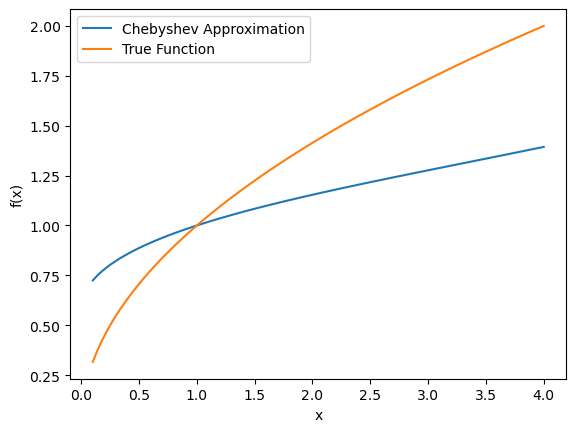

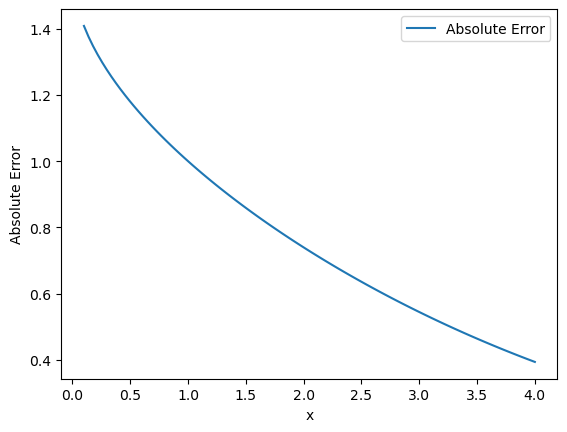

In [14]:
import matplotlib.pyplot as plt
plt.plot(x_values, approx_values, label='Chebyshev Approximation')
plt.plot(x_values, true_values, label='True Function')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()

#error
plt.figure()
plt.plot(x_values, error, label='Absolute Error')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()


In [21]:
import numpy as np
import math
from numpy.polynomial.chebyshev import chebval

def f(x):
    return np.sqrt(x)

# Chebyshev interpolation function
def chebyshev_interpolation(f, n):
    # Chebyshev nodes
    nodes = np.cos((2 * np.arange(1, n + 1) - 1) * np.pi / (2 * n))

    # Evaluate the function at the Chebyshev nodes
    values = f((nodes + 1) / 2)

    # Calculate Chebyshev coefficients using Chebyshev interpolation formula
    coefficients = np.zeros(n)
    for k in range(n):
        sum_val = 0
        for j in range(n):
            sum_val += values[j] * np.cos(k * np.arccos(nodes[j]))
        coefficients[k] = 2 * sum_val / n

    return coefficients

n = 6  # Choose the degree of the Chebyshev polynomial approximation
coefficients = chebyshev_interpolation(f, n)

print("Chebyshev coefficients:", coefficients)


Chebyshev coefficients: [ 1.27688293  0.42068097 -0.08087052  0.0318506  -0.01484002  0.00614694]
